# Use this code to fetch and Summarize News Article online

In [17]:
import bs4
bs4.__version__
import sys
import csv
from selenium import webdriver
import time
import re
import requests
from bs4 import BeautifulSoup

In [18]:

# if you pass the inputs in the command line
if (len(sys.argv) == 4):
    path_to_file = sys.argv[1]
    num_page = int(sys.argv[2])
    url = sys.argv[3]

In [19]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430


[WDM] - Driver [C:\Users\andyo\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


In [20]:
path_to_file = "park.csv"

In [21]:
num_page = 40

In [22]:
url = "https://www.tripadvisor.ca/Restaurant_Review-g155019-d1072610-Reviews-Moxie_s_Grill_Bar-Toronto_Ontario.html"

In [23]:
#path_to_file = "park.csv"
#num_page = 40
#url = "https://www.tripadvisor.ca/Attraction_Review-g155019-d185115-Reviews-Toronto_Island_Park-Toronto_Ontario.html"

 
#driver = webdriver.Chrome('./chromedriver_Win32/chromedriver')
driver.get(url)
driver.maximize_window()
                          
# Open the file to save the review
csvFile = open(path_to_file, 'a', encoding="utf-8")
csvWriter = csv.writer(csvFile)

# change the value inside the range to save more or less reviews
for i in range(0, num_page):
    
    try:
        driver.find_element_by_xpath("//span[@class='taLnk ulBlueLinks']").click()
    except:
        print("there is no read more element")
    
#     container = driver.find_elements_by_xpath(".//div[@class='review-container']")
    page_soup = BeautifulSoup(driver.page_source, 'html.parser')
    reviews_container = page_soup.find_all('div', class_='review-container')
    time.sleep(20)
    
    for j in range(len(reviews_container)):
        
        user = reviews_container[j].find_all('div', class_="memberOverlayLink clickable")
        UID = user[0].get('id')
        user_name = user[0].find_all('div')[-1].get_text()
        count_review = user[1].find_all('span')[-1].get_text()
        
        re = reviews_container[j].find('div', class_="ui_column is-9")

        title = re.find('span', class_='noQuotes').get_text()
        date = re.find('span', class_='ratingDate').get('title')
        rating = re.find('span', class_='ui_bubble_rating').get('class')[1].split('_')[1]
        review = re.find('p', class_='partial_entry').get_text()

        csvWriter.writerow([UID, user_name, count_review,date, rating, title, review]) 

    # change the page
    try:
        driver.find_element_by_xpath('.//a[@class="nav next ui_button primary"]').click()
    except:
        driver.close()
driver.close()

there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is no read more element
there is n

In [25]:
import pandas as pd
pd.options.display.max_rows = 10

import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df = pd.read_csv("Park_cleaned.csv", engine='python')
df

,Date,Rating,Topic,Reviews
0,08-May-21,30,Take out was ok,Ordered the salmon and Vindaloo. Vindaloo was ...
1,08-May-21,40,Great food at good price,The food and the staff here are great. We orde...
2,21-Dec-20,40,Great Food and Service,Had several meals from Moxieâ€™s while staying...
3,16-Aug-20,50,Overnight Stay for Layover,I travelled from Jamaica to Toronto and had a ...
4,17-Jul-20,50,Great Food & Great Staff,the food the people and the service is great!!...
...,...,...,...,...
387,05-Mar-18,10,Too noisy and expensive,Order in your room from dominos too expensive ...
388,03-Mar-18,40,"My ""go to restaurant""",Moxie's is my go to restaurant for a business ...
389,02-Mar-18,30,Average food and overpriced,My husband and I both had the roast beef dip s...
390,02-Mar-18,40,Just missed the mark,For supper the food was good but was never off...


In [27]:
df.columns

Index(['Date', 'Rating', 'Topic', 'Reviews'], dtype='object')

In [28]:
print(df.describe().transpose())

        count      mean       std   min   25%   50%   75%   max
Rating  392.0  46.22449  7.638281  10.0  40.0  50.0  50.0  50.0


In [29]:
df['Rating'] = df['Rating'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})
df

,Date,Rating,Topic,Reviews
0,08-May-21,NEUTRAL,Take out was ok,Ordered the salmon and Vindaloo. Vindaloo was ...
1,08-May-21,POSITIVE,Great food at good price,The food and the staff here are great. We orde...
2,21-Dec-20,POSITIVE,Great Food and Service,Had several meals from Moxieâ€™s while staying...
3,16-Aug-20,VERY POSITIVE,Overnight Stay for Layover,I travelled from Jamaica to Toronto and had a ...
4,17-Jul-20,VERY POSITIVE,Great Food & Great Staff,the food the people and the service is great!!...
...,...,...,...,...
387,05-Mar-18,VERY NEGATIVE,Too noisy and expensive,Order in your room from dominos too expensive ...
388,03-Mar-18,POSITIVE,"My ""go to restaurant""",Moxie's is my go to restaurant for a business ...
389,02-Mar-18,NEUTRAL,Average food and overpriced,My husband and I both had the roast beef dip s...
390,02-Mar-18,POSITIVE,Just missed the mark,For supper the food was good but was never off...


In [30]:
df.drop(['Topic'],axis=1,inplace=True)

In [31]:
df.head()

,Date,Rating,Reviews
0,08-May-21,NEUTRAL,Ordered the salmon and Vindaloo. Vindaloo was ...
1,08-May-21,POSITIVE,The food and the staff here are great. We orde...
2,21-Dec-20,POSITIVE,Had several meals from Moxieâ€™s while staying...
3,16-Aug-20,VERY POSITIVE,I travelled from Jamaica to Toronto and had a ...
4,17-Jul-20,VERY POSITIVE,the food the people and the service is great!!...


In [32]:
print(len(df))

392


In [33]:
df['Reviews'].nunique()

392

In [34]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [36]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [37]:
df["Reviews"] = df["Reviews"].apply(lambda x: clean(x))

In [38]:
df.head(20)

,Date,Rating,Reviews
0,08-May-21,NEUTRAL,ordered the salmon and vindaloo vindaloo was o...
1,08-May-21,POSITIVE,the food and the staff here are great we order...
2,21-Dec-20,POSITIVE,had several meals from moxieâ s while staying ...
3,16-Aug-20,VERY POSITIVE,i travelled from jamaica to toronto and had a ...
4,17-Jul-20,VERY POSITIVE,the food the people and the service is great t...
...,...,...,...
15,06-Mar-20,VERY POSITIVE,yamila was such a great server we were out for...
16,06-Mar-20,VERY POSITIVE,she very friendly recommended the drink specia...
17,06-Mar-20,VERY POSITIVE,we were here with a large group to head out on...
18,06-Mar-20,VERY POSITIVE,we recently stopped here prior to a flight gre...


# Stopwords
#Stopwords are words in NLP that have a very little meaning, such as "is", "an", "the", etc

In [39]:
df["Reviews"] = df["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [40]:
df["Reviews"][6]

'limited take menu ordered pasta dish terrific pleasantly surpised'

# Stemming
#Stemming is the removal of inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis). In other words, Stemming is a method of normalization of words in NLP

In [41]:
st = PorterStemmer()
df['cleaned_Reviews'] = df['Reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Reviews']

0      ordered salmon vindaloo vindaloo one ill prepa...
1      food staff great ordered burger along baby bac...
2      several meals moxieâ staying sandman hotel imp...
3      travelled jamaica toronto hr layover stayed sa...
4      food people service great white chocolate brow...
                             ...                        
387    order room dominos expensive loud cannot carrr...
388    moxie go restaurant business lunch relaxed env...
389    husband roast beef dip sandwich tasted like re...
390    supper food good never offered refill water br...
391    moxie canadian chain restaurant mix upscale ca...
Name: Reviews, Length: 392, dtype: object

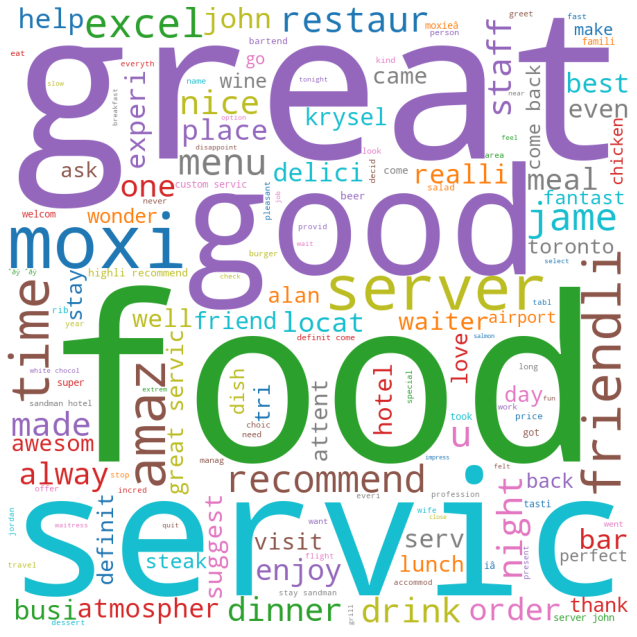

In [42]:
reviews = pd.Series(df["cleaned_Reviews"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900,background_color='white', colormap='tab10', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

#Check colors https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Tokenization
Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [43]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [44]:
df['Reviews']=df['Reviews'].apply(str)

In [45]:
tokenizer = RegexpTokenizer(r'\w+')
df["Reviews_Token"] = df["Reviews"].apply(lambda x: tokenizer.tokenize(x))

In [46]:
df['Reviews_Token']

0      [ordered, salmon, vindaloo, vindaloo, one, ill...
1      [food, staff, great, ordered, burger, along, b...
2      [several, meals, moxieâ, staying, sandman, hot...
3      [travelled, jamaica, toronto, hr, layover, sta...
4      [food, people, service, great, white, chocolat...
                             ...                        
387    [order, room, dominos, expensive, loud, cannot...
388    [moxie, go, restaurant, business, lunch, relax...
389    [husband, roast, beef, dip, sandwich, tasted, ...
390    [supper, food, good, never, offered, refill, w...
391    [moxie, canadian, chain, restaurant, mix, upsc...
Name: Reviews_Token, Length: 392, dtype: object

# Lemmatization
Lemmatization extracts the root of the word. For example, from the word "driving', "drive" is extracted. Unlike stemming, lemmatization understands the context and provides the root words rather than simply removing the suffix or prefix of the word.

In [47]:
lemm = WordNetLemmatizer()

In [48]:
def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [49]:
df["Reviews_Lemm"] = df["Reviews_Token"].apply(lambda x: lemm_text(x))

In [50]:
df[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
334,"[great, experience, first, encounter, called, ...","[great, experience, first, encounter, call, ma..."
40,"[first, time, visit, moxie, impressed, restaur...","[first, time, visit, moxie, impress, restauran..."
8,"[scott, came, friday, night, lovely, pleasure,...","[scott, come, friday, night, lovely, pleasure,..."
329,"[excellent, service, especially, server, james...","[excellent, service, especially, server, james..."
129,"[restaurant, specialize, ethnic, foods, right,...","[restaurant, specialize, ethnic, food, right, ..."
...,...,...
82,"[discovered, moxies, almost, year, ago, made, ...","[discover, moxie, almost, year, ago, make, sec..."
199,"[went, mother, day, service, friendly, kitchen...","[go, mother, day, service, friendly, kitchen, ..."
255,"[great, experience, tonight, moxies, service, ...","[great, experience, tonight, moxie, service, t..."
185,"[moxie, sandman, hotel, go, restaurant, choice...","[moxie, sandman, hotel, go, restaurant, choice..."


In [51]:
df.to_csv("Cleaned_Reviews.csv")

In [52]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [53]:
#Analyze positive and negative statements from the review
def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

#Analyze personal opinion, emotion or judgment 
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

In [54]:
df.dropna(subset=['Reviews_Lemm'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [55]:
df['Subjectivity'] = df['Reviews_Lemm'].apply(getSubjectivity)
df['Polarity'] = df['Reviews_Lemm'].apply(getPolarity)
df.sample(5)

,Date,Rating,Reviews,cleaned_Reviews,Reviews_Token,Reviews_Lemm,Subjectivity,Polarity
102,30-Aug-19,VERY POSITIVE,family great time going dinner food delicious ...,famili great time go dinner food delici server...,"[family, great, time, going, dinner, food, del...","[family, great, time, go, dinner, food, delici...",0.750000,0.725000
370,04-Jun-18,VERY POSITIVE,solid place great service wonderful food near ...,solid place great servic wonder food near airp...,"[solid, place, great, service, wonderful, food...","[solid, place, great, service, wonderful, food...",0.575000,0.500000
342,04-Oct-18,VERY NEGATIVE,ask want eggs cook husband recently stayed adj...,ask want egg cook husband recent stay adjac ho...,"[ask, want, eggs, cook, husband, recently, sta...","[ask, want, egg, cook, husband, recently, stay...",0.275000,0.500000
213,20-Mar-19,POSITIVE,always moxies good decor service food large se...,alway moxi good decor servic food larg serv se...,"[always, moxies, good, decor, service, food, l...","[always, moxie, good, decor, service, food, la...",0.631066,0.473469
183,23-Jul-19,VERY POSITIVE,love coming sarah manager amazing always top n...,love come sarah manag amaz alway top notch foo...,"[love, coming, sarah, manager, amazing, always...","[love, come, sarah, manager, amaze, always, to...",0.597500,0.490000


In [56]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
#df.head()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   392 non-null    object 
 1   Rating                 392 non-null    object 
 2   Reviews                392 non-null    object 
 3   cleaned_Reviews        392 non-null    object 
 4   Reviews_Token          392 non-null    object 
 5   Reviews_Lemm           392 non-null    object 
 6   Subjectivity           392 non-null    float64
 7   Polarity               392 non-null    float64
 8   Analysis_Polarity      392 non-null    object 
 9   Analysis_Subjectivity  392 non-null    object 
dtypes: float64(2), object(8)
memory usage: 30.8+ KB


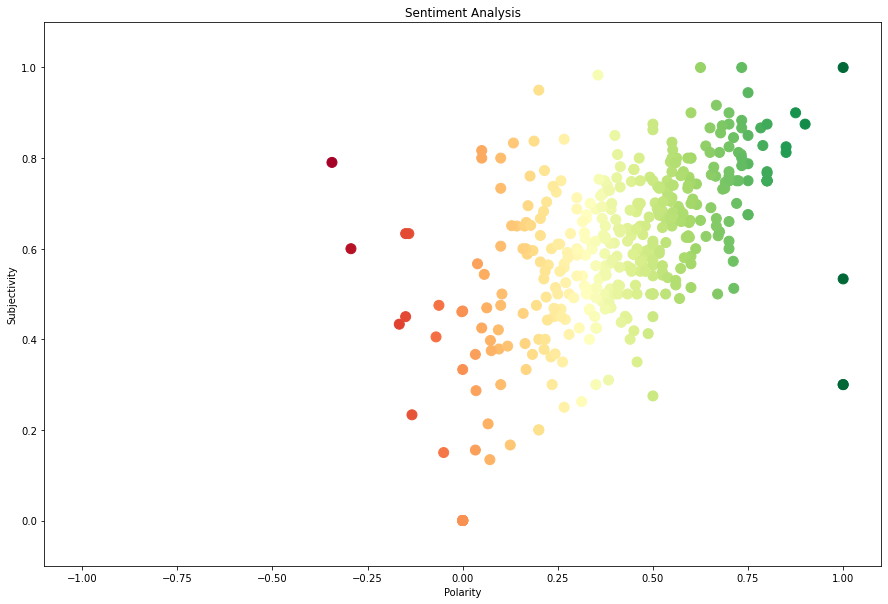

(None,)

In [58]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

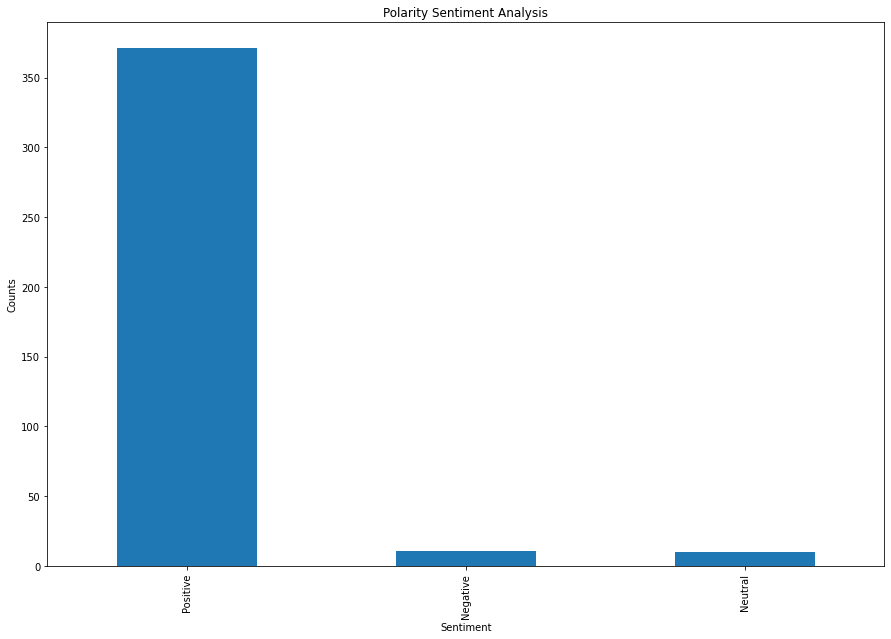

In [59]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

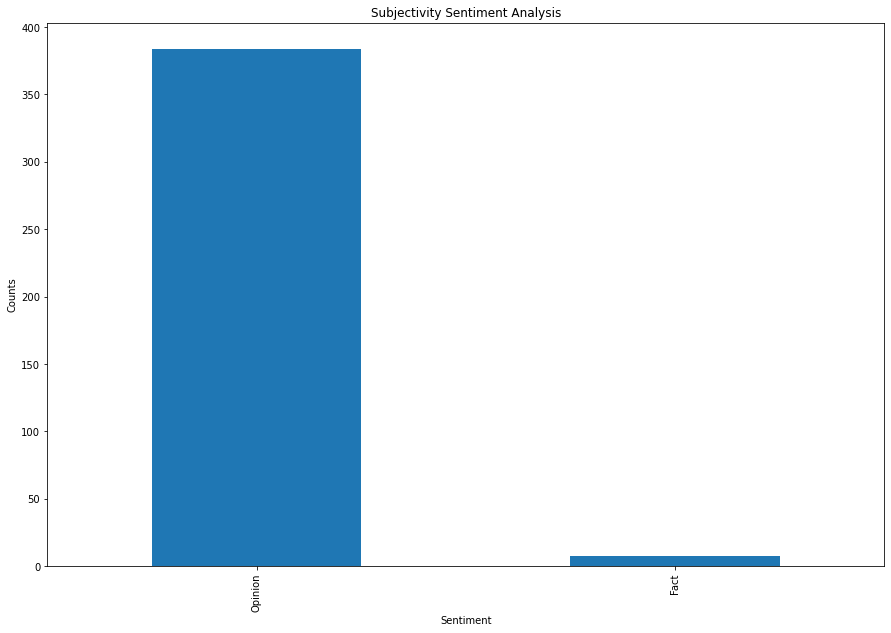

In [60]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [61]:
df['Rating'] = df['Rating'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})

C:\Users\andyo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


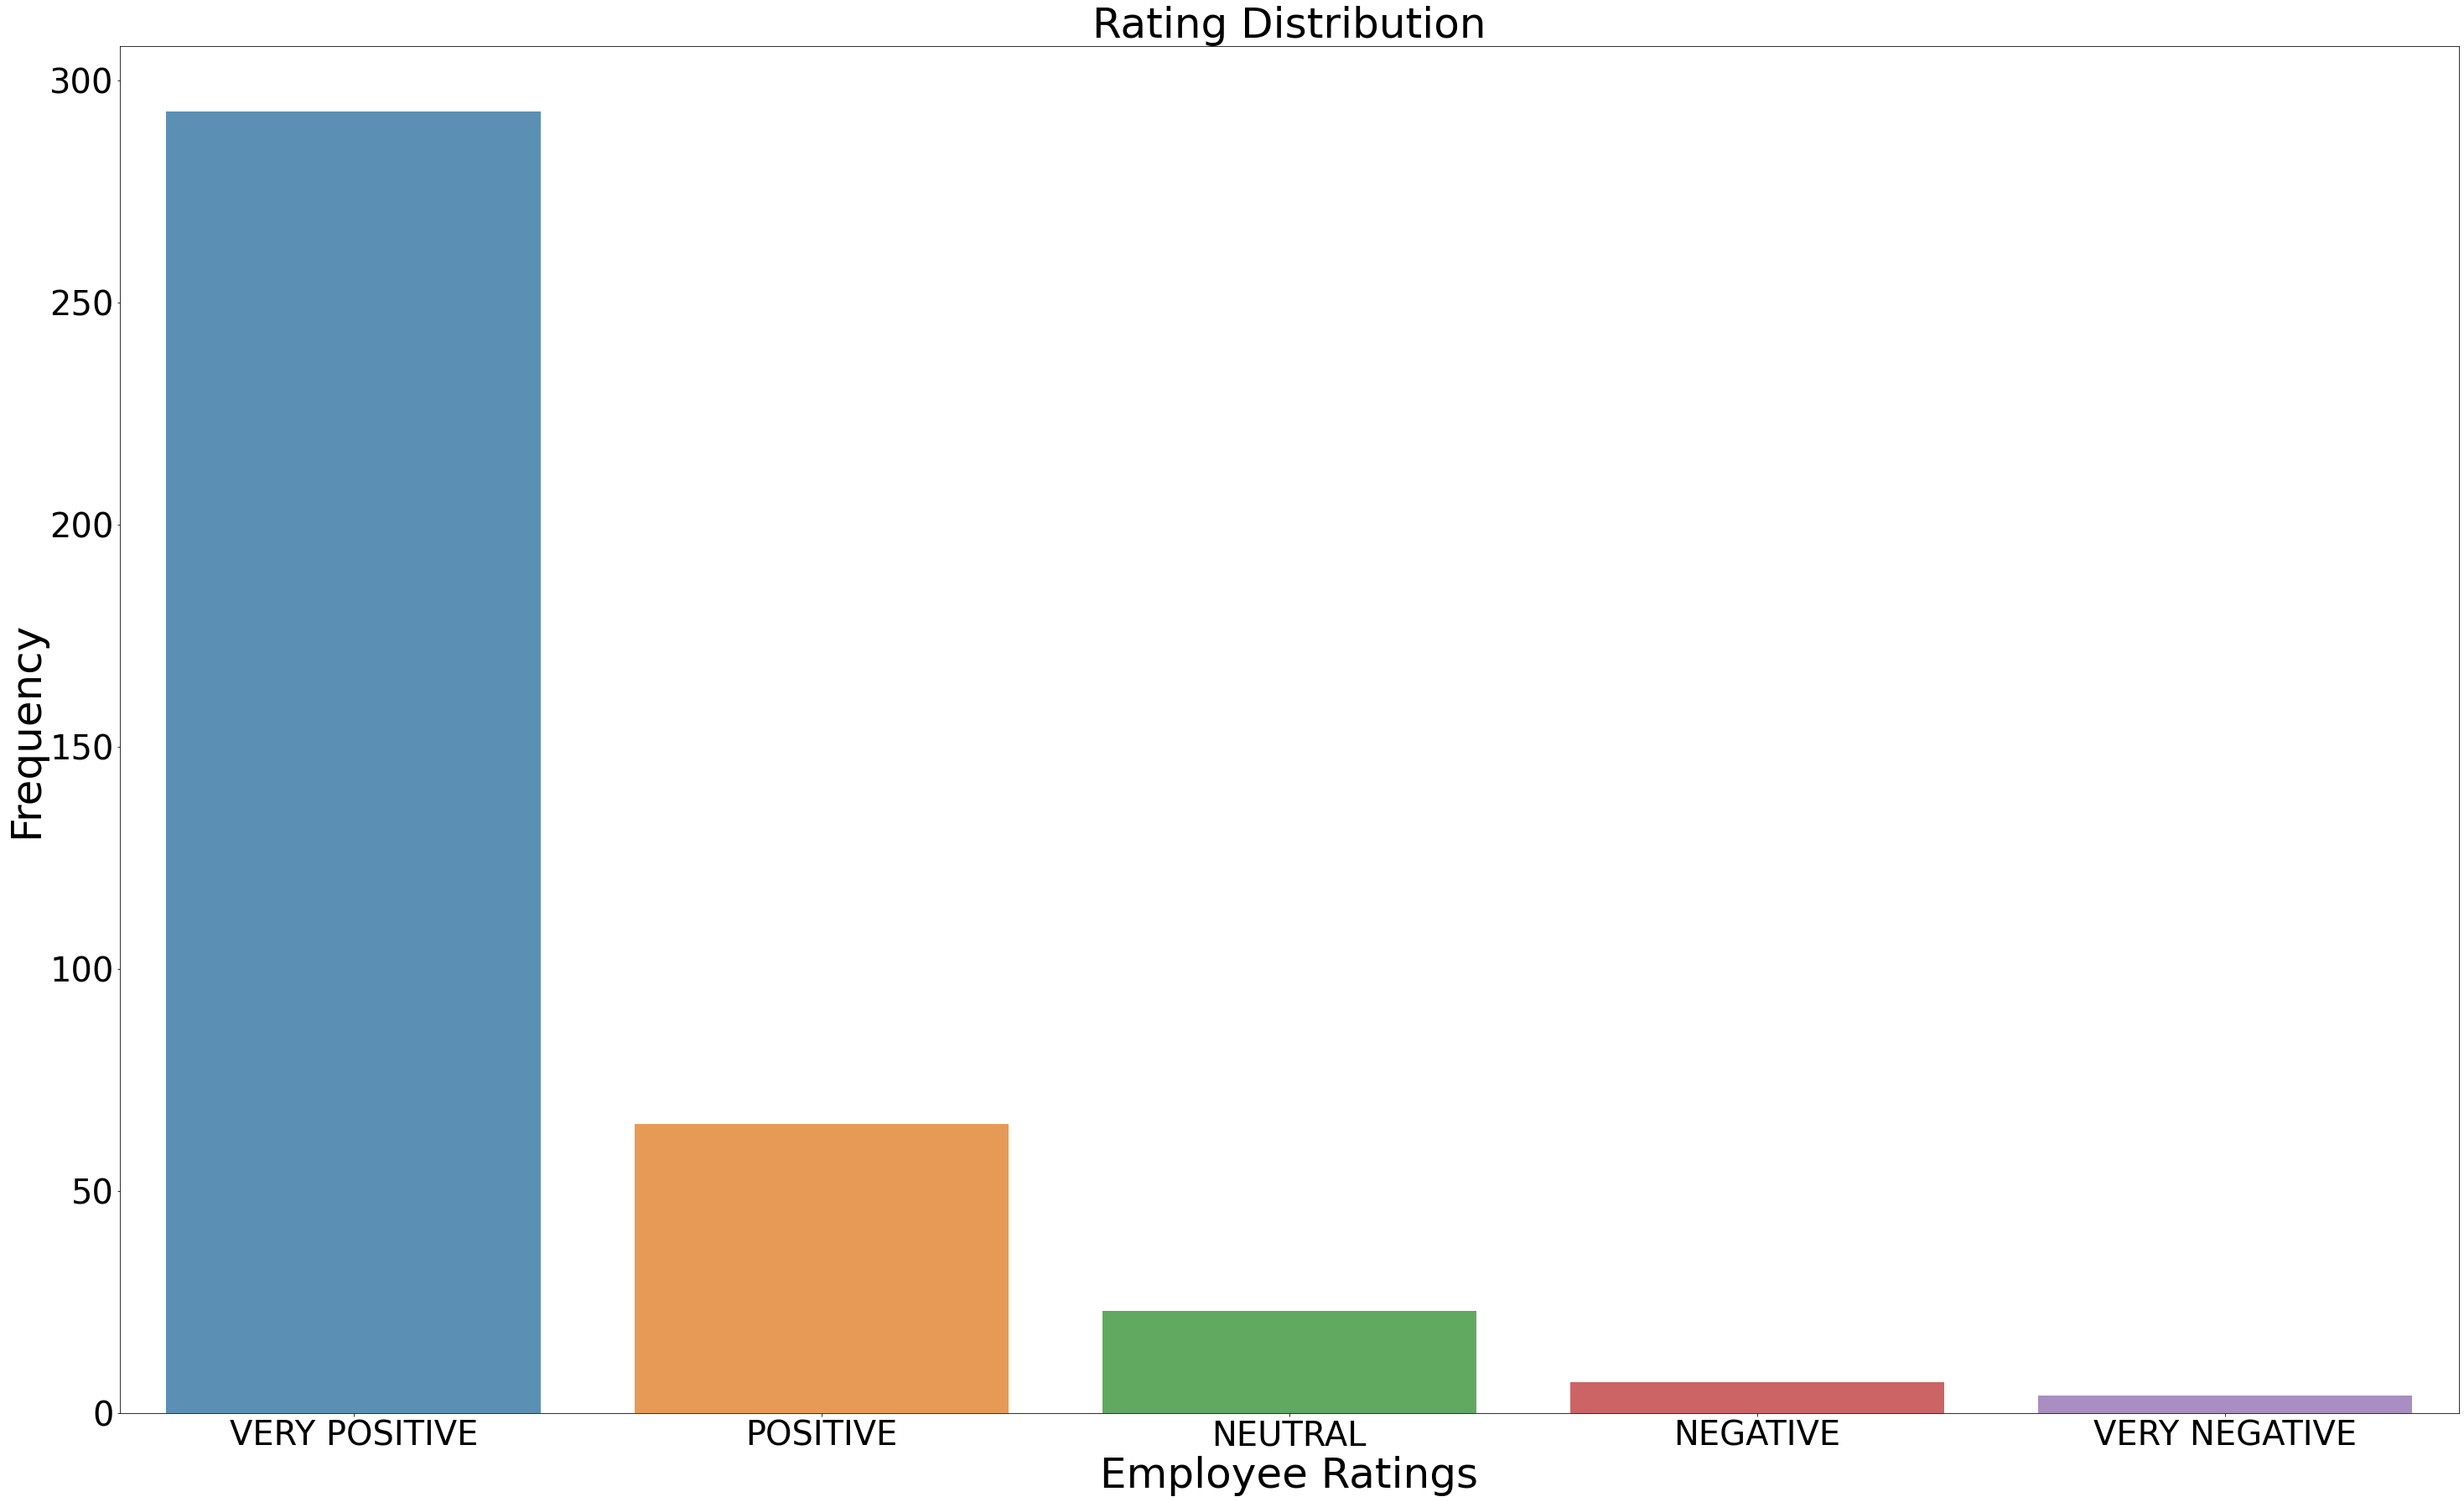

In [62]:

x_rating = df.Rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

In [63]:
import itertools
import collections

In [64]:
review_list = list(itertools.chain.from_iterable(df['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(10), columns=['Words', 'Count'])
word_freq_DF

,Words,Count
0,great,212
1,food,187
2,service,164
3,server,111
4,moxie,107
5,good,106
6,come,95
7,make,79
8,friendly,71
9,time,66


<AxesSubplot:xlabel='Words', ylabel='Count'>

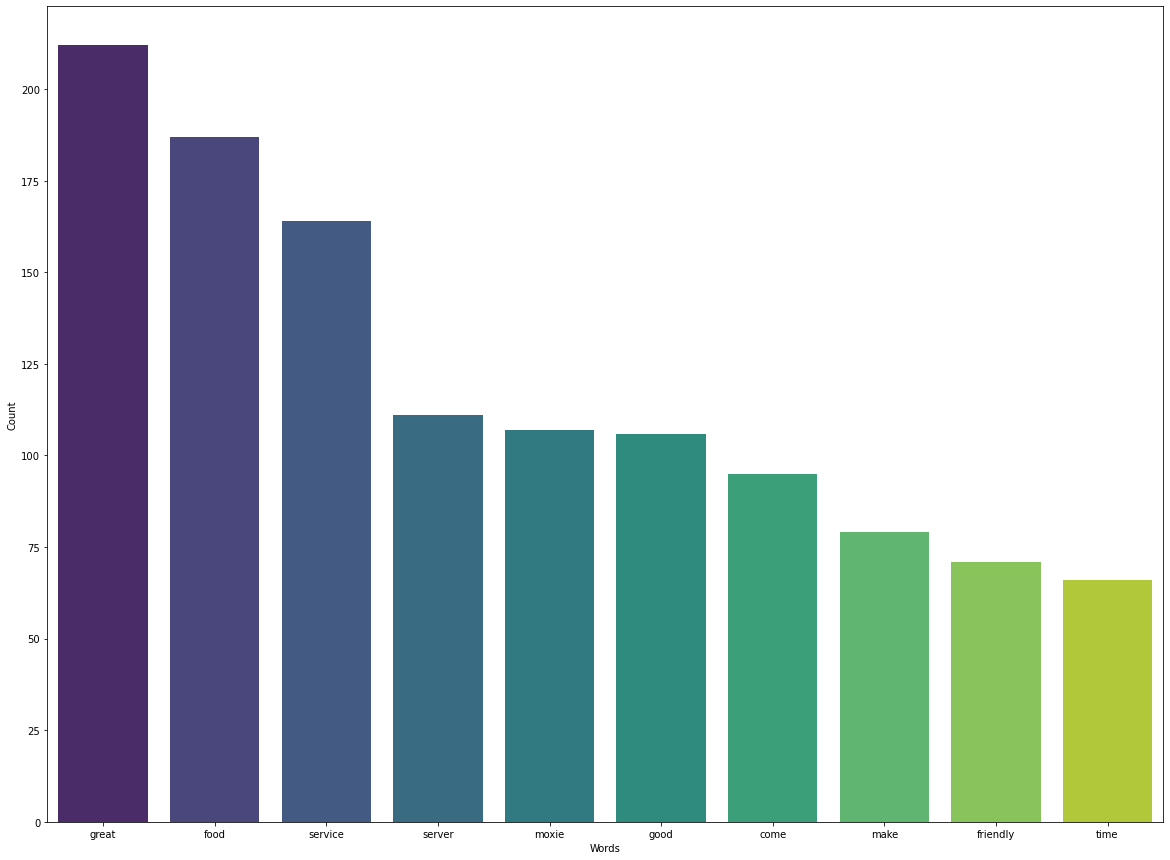

In [65]:
plt.figure(figsize=(20,15)) 
sns.barplot(data = word_freq_DF,x = "Words", y = "Count", palette = 'viridis')

In [66]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [67]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_Reviews'].values.astype('U'))
print(dtm_tf.shape)

(392, 133)


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_Reviews'].values.astype('U'))
print(dtm_tfidf.shape)

(392, 133)


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\andyo\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [69]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=50)

In [70]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['tonight', 'nice', 'suggest', 'restaur', 'time', 'excel', 'night', 'john', 'servic', 'friendli', 'lunch', 'like', 'wonder', 'ask', 'order', 'menu', 'gave', 'recommend', 'kind', 'option', 'waiter', 'went', 'help', 'attent', 'famili', 'moxi', 'experi', 'jame', 'server', 'great']


Top 10 words for topic #1:
['awesom', 'restaur', 'amaz', 'better', 'browni', 'order', 'salad', 'incred', 'moxiea', 'steak', 'locat', 'tri', 'realli', 'dinner', 'server', 'chicken', 'definit', 'bar', 'recommend', 'suggest', 'nice', 'john', 'wine', 'pasta', 'servic', 'dish', 'food', 'great', 'menu', 'good']


Top 10 words for topic #2:
['bar', 'tabl', 'went', 'visit', 'pleasant', 'super', 'experi', 'krysel', 'price', 'alway', 'restaur', 'place', 'profession', 'offer', 'fantast', 'person', 'recommend', 'atmospher', 'moxi', 'server', 'custom', 'thank', 'friendli', 'long', 'day', 'food', 'amaz', 'jame', 'servic', 'great']


Top 10 words for topic #3:
['great', 'perfect', 'alway', 'recomme

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.132594  0.200650       1        1  17.879939
4     -0.008123  0.014099       2        1  15.956225
5     -0.075162 -0.037065       3        1  15.876107
2      0.043708 -0.005183       4        1  11.396075
7      0.216337  0.115243       5        1  10.530886
1     -0.192338 -0.080293       6        1  10.400041
3      0.063486 -0.063849       7        1   9.881395
0      0.084685 -0.143603       8        1   8.079333, topic_info=        Term        Freq       Total Category  logprob  loglift
61      jame   71.000000   71.000000  Default  30.0000  30.0000
51      good  101.000000  101.000000  Default  29.0000  29.0000
59     hotel   44.000000   44.000000  Default  28.0000  28.0000
19      came   45.000000   45.000000  Default  27.0000  27.0000
53     great  205.000000  205.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
79      nice    3.098748   43.631247   Topic8  -4.6203  -0.1289
102   servic    5.551073  159.696244   Topic8  -4.0373  -0.8434
95   restaur    3.268299   51.021281   Topic8  -4.5671  -0.2321
40     excel    3.414374   60.047161   Topic8  -4.5233  -0.3513
114     time    3.349488   65.438491   Topic8  -4.5425  -0.4564

[345 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.188838  accommod
0         3  0.660934  accommod
0         4  0.094419  accommod
0         7  0.094419  accommod
1         1  0.835451   airport
...     ...       ...       ...
131       8  0.388865    wonder
132       1  0.445188      work
132       3  0.370990      work
132       5  0.074198      work
132       7  0.074198      work

[508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 3, 8, 2, 4, 1])

In [72]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(392, 8)

In [73]:
df.columns

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Date', 'Rating', 'Reviews', 'cleaned_Reviews', 'Reviews_Token',
       'Reviews_Lemm', 'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity'],
      dtype='object')

In [74]:
df=df.replace({0:'Food',1:'Rock',2:'Hard',3:'Good',4:'great',5:'Time',6:'Service',7:'visit'})

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
df['Topic'] = topic_values.argmax(axis=1)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
df2 = df.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()
df2['Total'] = df2.sum(axis=1)

df2

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,1.0,1.0,26.0,28.0
1,1.0,2.0,35.0,38.0
2,2.0,NaN,46.0,48.0
3,NaN,NaN,35.0,35.0
4,1.0,2.0,63.0,66.0
5,3.0,NaN,68.0,71.0
6,3.0,5.0,60.0,68.0
7,NaN,NaN,38.0,38.0


In [77]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,4.0,4.0,93.0,100.0
1,3.0,5.0,92.0,100.0
2,4.0,NaN,96.0,100.0
3,NaN,NaN,100.0,100.0
4,2.0,3.0,95.0,100.0
5,4.0,NaN,96.0,100.0
6,4.0,7.0,88.0,100.0
7,NaN,NaN,100.0,100.0


In [78]:
df2=df2.fillna(0)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


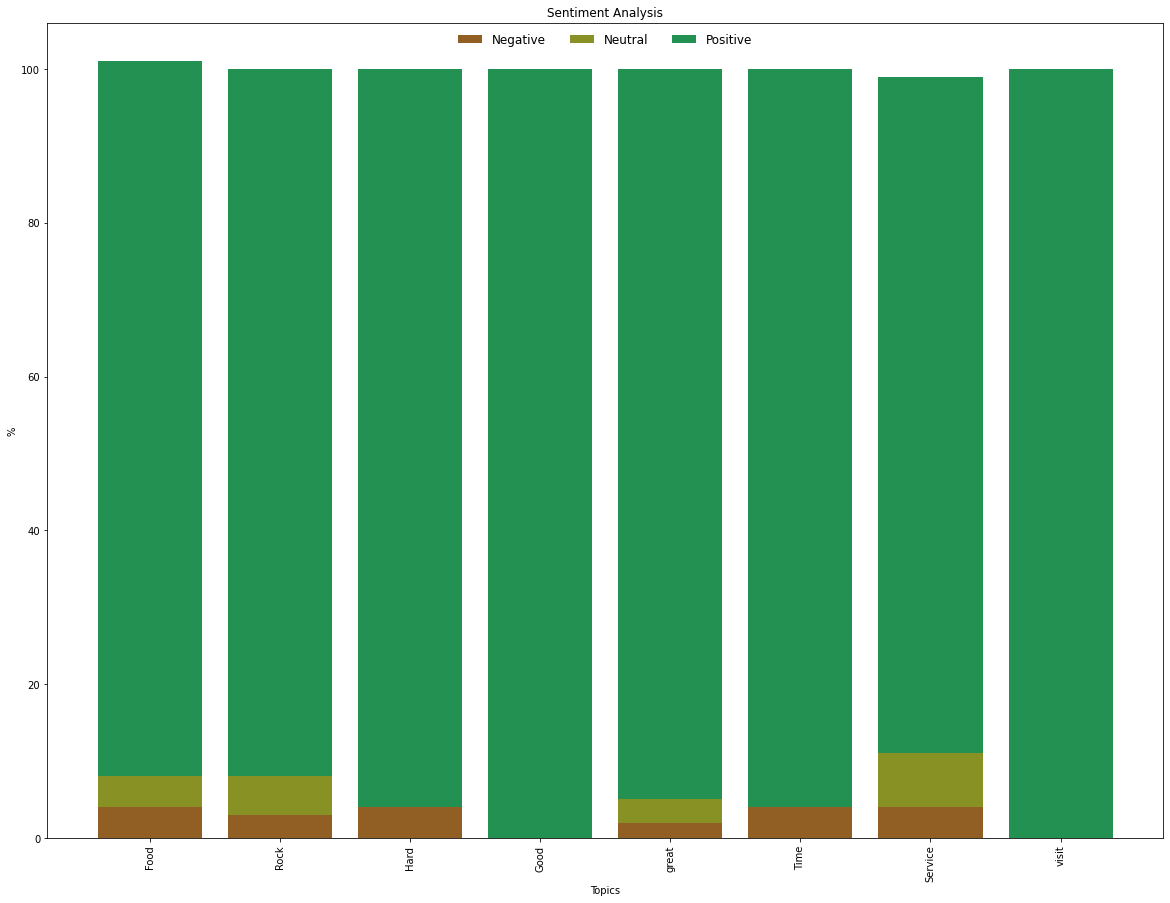

In [80]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 



topic = ['Food','Rock','Hard','Good','great','Time','Service','visit']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#915e23')
p2=plt.bar(topic,df2['Neutral'], color='#889123', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#239151', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topics")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()